# Diabetes, HyperTension and Stroke Prediction with Machine learning. 

## Outlines :


## 1. Importing and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')



In [2]:
pth = '/Users/aryansharma/Desktop/Sneha_Reddy_DHP/data/'

In [3]:
diabetes = pd.read_csv(pth + 'diabetes_data.csv')

In [4]:
hypertension = pd.read_csv(pth + 'hypertension_data.csv')

In [5]:
stroke = pd.read_csv(pth + 'stroke_data.csv')

In [6]:
diabetes

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [7]:
diabetes.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [8]:
#Lowercasing column names. 

diabetes.columns = diabetes.columns.str.lower()

In [9]:
hypertension

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [10]:
stroke

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [11]:
diabetes.isnull().sum()

age                     0
sex                     0
highchol                0
cholcheck               0
bmi                     0
smoker                  0
heartdiseaseorattack    0
physactivity            0
fruits                  0
veggies                 0
hvyalcoholconsump       0
genhlth                 0
menthlth                0
physhlth                0
diffwalk                0
stroke                  0
highbp                  0
diabetes                0
dtype: int64

In [12]:
hypertension.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [13]:
stroke.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
# having more than 25000 samples it is safe to drop out null samples 

hypertension.shape

(26083, 14)

In [15]:
hypertension.dropna(how='any', axis = 0, inplace = True)

In [16]:
#Similarly for stroke dataset. 

stroke.dropna(how='any', axis = 0, inplace = True)

## 2. EDA on Diabetes

In [17]:
diabetes.columns

Index(['age', 'sex', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'genhlth', 'menthlth', 'physhlth', 'diffwalk',
       'stroke', 'highbp', 'diabetes'],
      dtype='object')

In [18]:
# Age distribution of samples in the dataset. 
diabetes.age.value_counts()

age
10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: count, dtype: int64

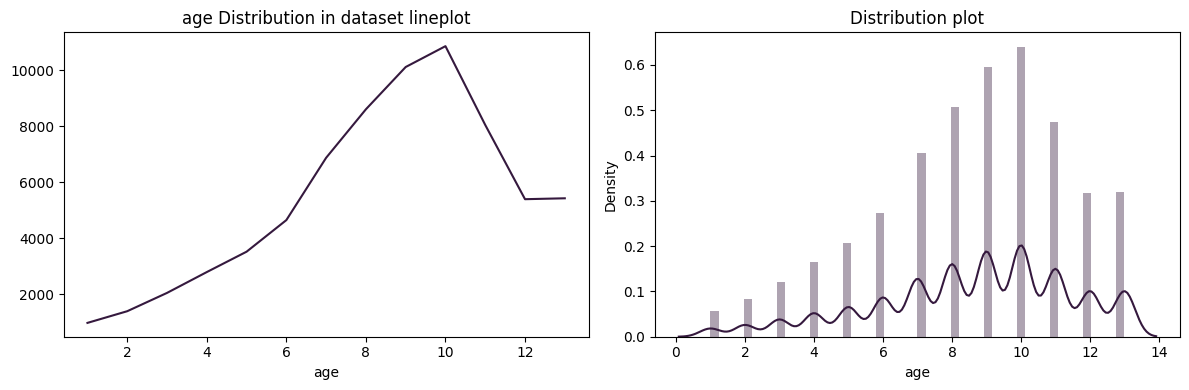

In [19]:
# The data contains samples of people ageing in categories 1 to 13. 
# Visually: 

#As per the data description, The age classes are divided as follows :

#    1. 8-24 years old
#    2. 25-29 years old
#    3. 30-34 years old
#    4. 35-39 years old
#    5. 40-44 years old
#    6. 45-49 years old
#    7. 50-54 years old
#    8. 55-59 years old
#    9. 60-64 years old
#   10. 65-69 years old
#   11. 70-74 years old
#   12. 75-79 years old
#   13. 80 or older

age = diabetes.age.value_counts()
plt.figure(figsize=(12,4))
sns.set_palette('rocket')

plt.subplot(1,2,1)
sns.lineplot(x = age.index, y = age.values)
plt.title('age Distribution in dataset lineplot')

plt.subplot(1,2,2)
sns.distplot(diabetes['age'])
plt.title('Distribution plot')

plt.tight_layout()
plt.show()

In [20]:
# Balance of Dataset as per 'sex'

diabetes.sex.value_counts()

sex
0.0    38386
1.0    32306
Name: count, dtype: int64

<Axes: xlabel='sex'>

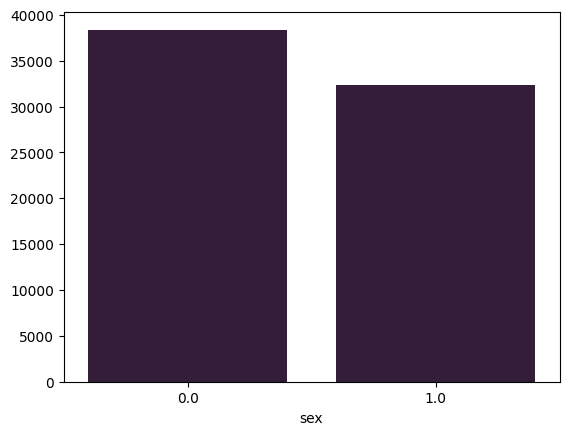

In [21]:
# By the provided description, 0 represents Male and 1 Represents Female. 
# visually :
sex_count = diabetes.sex.value_counts()
sns.barplot(x=sex_count.index, y=sex_count.values)

In [22]:
#Proportion of people who have undergone cholestrol check
# 0 = No check in last 5 years , 1 otherwise

np.round((len (diabetes[diabetes['cholcheck'] == 1]) / len(diabetes)) *100, 2)


97.53

In [23]:
# Almost 98 % have had a cholestrol check but how many do actually have high cholestrol ?
# 0 = No high cholestrol, 1 otherwise. 

diabetes.highchol.value_counts()

highchol
1.0    37163
0.0    33529
Name: count, dtype: int64

<Axes: xlabel='cholcheck'>

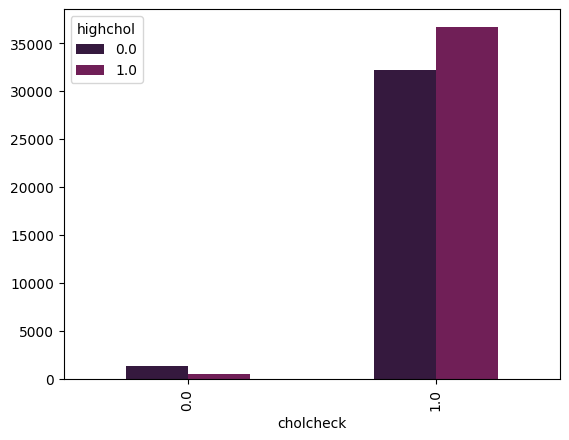

In [24]:
# Distribution of high cholestrol within checks done or not. 

diabetes.groupby('cholcheck')['highchol'].value_counts().unstack(1).plot(kind='bar')

In [25]:
# Distribution of BMI among the different age categories

diabetes.groupby('age')['bmi'].mean()

age
1.0     26.212462
2.0     28.121060
3.0     29.006345
4.0     29.744719
5.0     30.434091
6.0     30.576162
7.0     30.631548
8.0     30.706614
9.0     30.582377
10.0    30.395357
11.0    29.614495
12.0    28.754171
13.0    27.048470
Name: bmi, dtype: float64

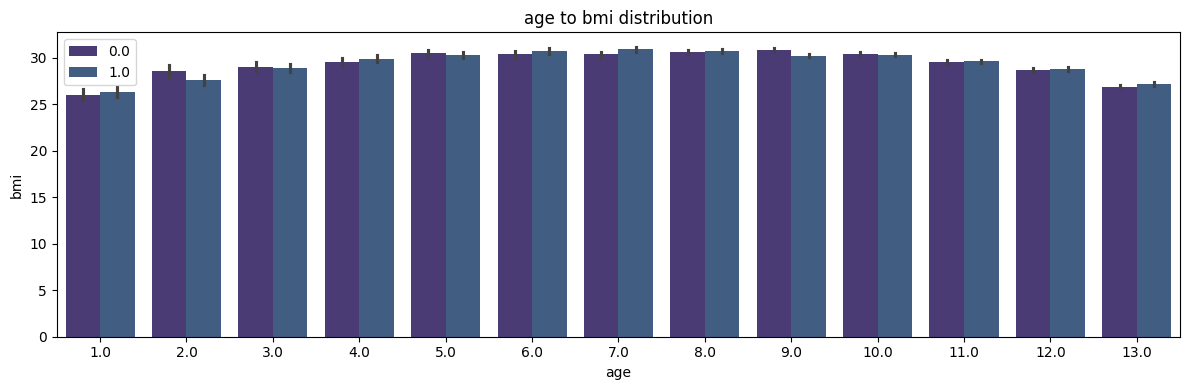

In [26]:
# Visually:

plt.figure(figsize=(12,4))
sns.set_palette('viridis')
sns.barplot(x = diabetes['age'], y = diabetes['bmi'], hue = diabetes['sex'])
plt.title('age to bmi distribution')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# It can be seen that age does not necessarily affect the BMI levels for either of the 2 genders.

In [28]:
# percentage of people who are smokers 
# 1 = have smoked at least 100 cigeretes by the current age , 0. otherwise

np.round(len(diabetes[diabetes['smoker'] == 1 ]) / len(diabetes) *100, 2)

47.53

In [29]:
# Almost 48% people are regular smokers (close to half)
# what is the relation of smoking habit to diabetes and overall BMI ?

diabetes.groupby('smoker')['diabetes'].value_counts()

smoker  diabetes
0.0     0.0         20065
        1.0         17029
1.0     1.0         18317
        0.0         15281
Name: count, dtype: int64

In [30]:
diabetes.groupby('smoker')['bmi'].mean()

smoker
0.0    29.778778
1.0    29.943330
Name: bmi, dtype: float64

In [31]:
# No Considerable effect of smoking on BMI and Diabetes.
# How many patients have heart condition history ?  

# 0 = No History of Coronary heart disease or Miyocardial Infraction , 1 otherwise. 

diabetes.heartdiseaseorattack.value_counts()

heartdiseaseorattack
0.0    60243
1.0    10449
Name: count, dtype: int64

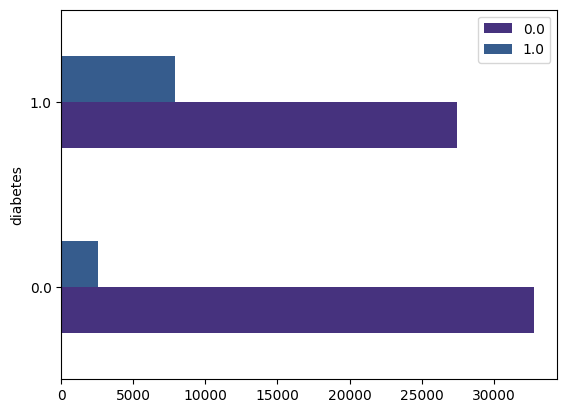

In [32]:
# A significant number of people have heart disease history. How is it related to diabitic issues ?

diabetes.groupby('heartdiseaseorattack')['diabetes'].value_counts().unstack(0).plot(kind = 'barh')
plt.legend()

In [33]:
diabetes.columns

Index(['age', 'sex', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'genhlth', 'menthlth', 'physhlth', 'diffwalk',
       'stroke', 'highbp', 'diabetes'],
      dtype='object')

In [34]:
# Average physical health score of individuals among different age groups

# physhlth : Now thinking about your physical health, which includes physical illness and injury,
#for how many days during the past 30

diabetes.groupby('age')['physhlth'].mean()

age
1.0     2.136874
2.0     2.294413
3.0     2.934114
4.0     3.311135
5.0     4.249432
6.0     5.508391
7.0     6.339494
8.0     6.636057
9.0     6.592366
10.0    6.051769
11.0    5.946793
12.0    6.095106
13.0    6.617398
Name: physhlth, dtype: float64

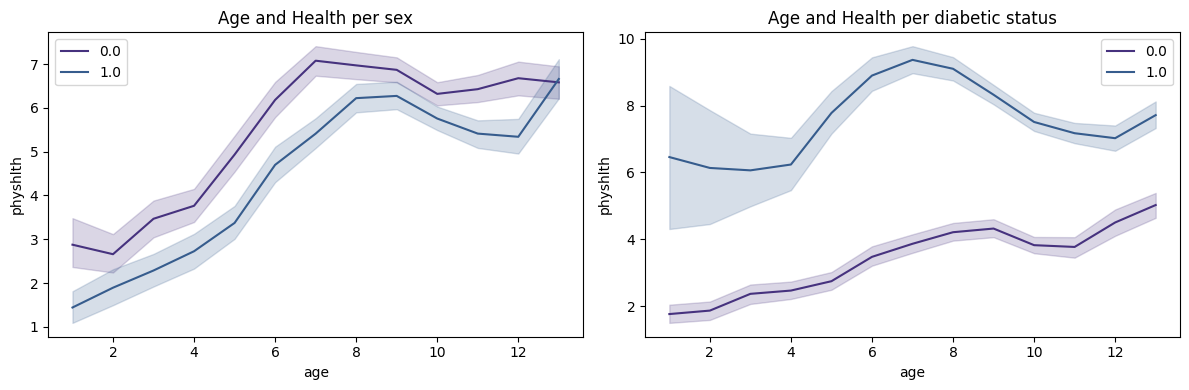

In [35]:
# Visually per sex and diabetic status

plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.lineplot(x = diabetes['age'], y = diabetes['physhlth'], hue = diabetes['sex'])
plt.legend()
plt.title('Age and Health per sex')

plt.subplot(1,2,2)
sns.lineplot(x = 'age', y='physhlth', data=diabetes, hue= 'diabetes')
plt.legend()
plt.title('Age and Health per diabetic status')

plt.tight_layout()
plt.show()

In [36]:
# Are there poeple facing difficulty in walking stairs and how is related to health conditions ?
# 0 = no difficulty, 1 otherwise.


diabetes.diffwalk.value_counts()

diffwalk
0.0    52826
1.0    17866
Name: count, dtype: int64

In [37]:
# Significant amount of poeple have difficulty in climbing stairs. their general health condition

# 1-5 from excellent to poor 

diabetes.groupby('diffwalk')['genhlth'].value_counts()


diffwalk  genhlth
0.0       3.0        18508
          2.0        18327
          1.0         7964
          4.0         6711
          5.0         1316
1.0       4.0         6592
          3.0         4919
          5.0         4492
          2.0         1545
          1.0          318
Name: count, dtype: int64

<Axes: xlabel='diffwalk'>

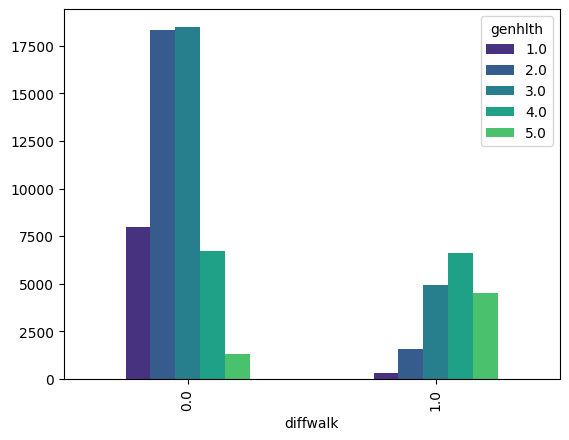

In [38]:
#  
diabetes.groupby('diffwalk')['genhlth'].value_counts().unstack(1).plot(kind='bar')

In [39]:
diabetes.columns


Index(['age', 'sex', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'genhlth', 'menthlth', 'physhlth', 'diffwalk',
       'stroke', 'highbp', 'diabetes'],
      dtype='object')

In [40]:
# Effect of heavy alchohol consumption on mental and general health and diabetes. 

# Heavy drinkers (adult men having more than 14 drinks per week,
# and adult women having more than 7 drinks per week) 0 = no, 1 otherwise. 

diabetes.hvyalcoholconsump.value_counts()


hvyalcoholconsump
0.0    67672
1.0     3020
Name: count, dtype: int64

In [41]:
diabetes[diabetes['hvyalcoholconsump'] == 1].groupby('diabetes')['physhlth'].mean()

diabetes
0.0    3.231718
1.0    6.323317
Name: physhlth, dtype: float64

In [42]:
diabetes[diabetes['hvyalcoholconsump'] == 1].groupby('diabetes')['menthlth'].mean()

diabetes
0.0    4.001828
1.0    5.284856
Name: menthlth, dtype: float64

In [43]:
diabetes[diabetes['hvyalcoholconsump'] == 1].groupby('diabetes')['genhlth'].value_counts()

diabetes  genhlth
0.0       2.0        835
          3.0        607
          1.0        497
          4.0        196
          5.0         53
1.0       3.0        323
          4.0        205
          2.0        186
          5.0         79
          1.0         39
Name: count, dtype: int64

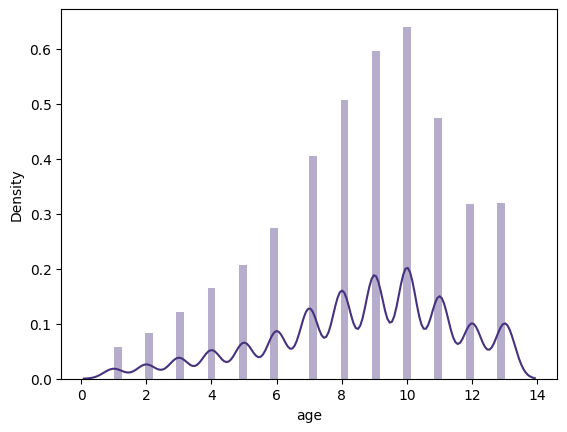

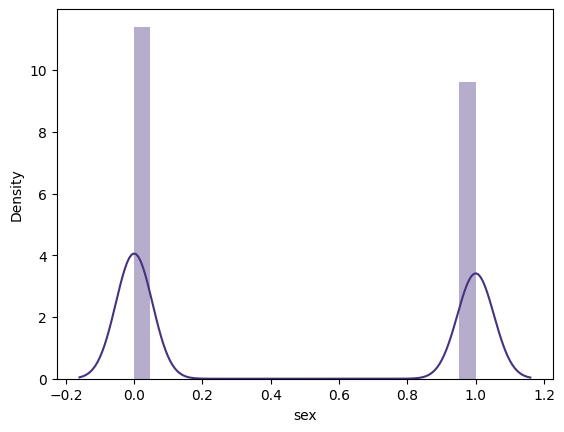

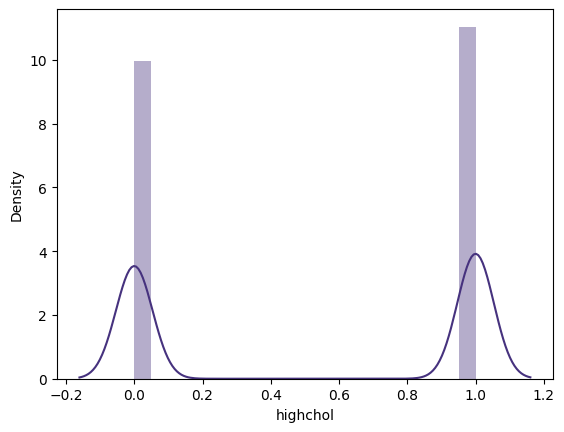

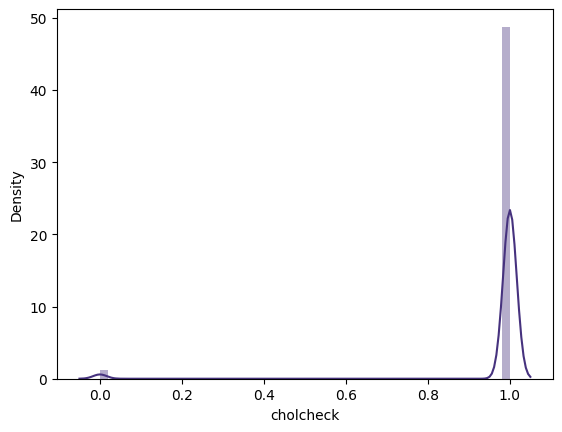

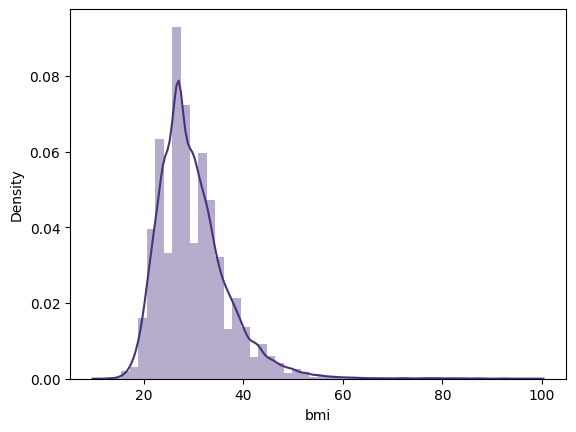

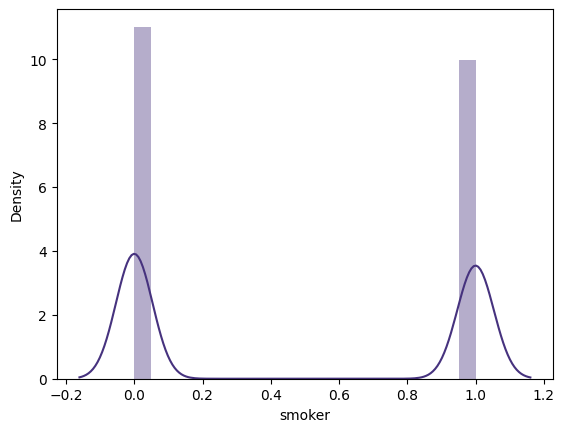

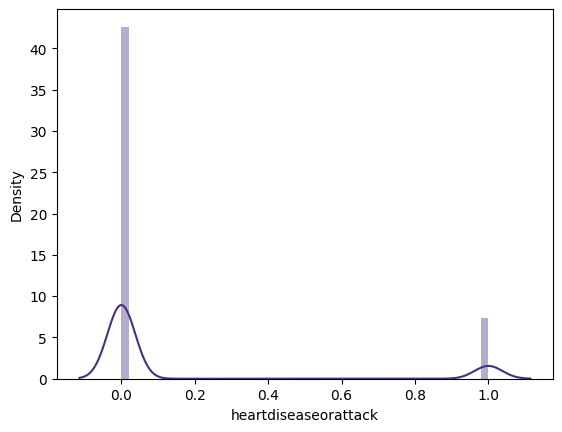

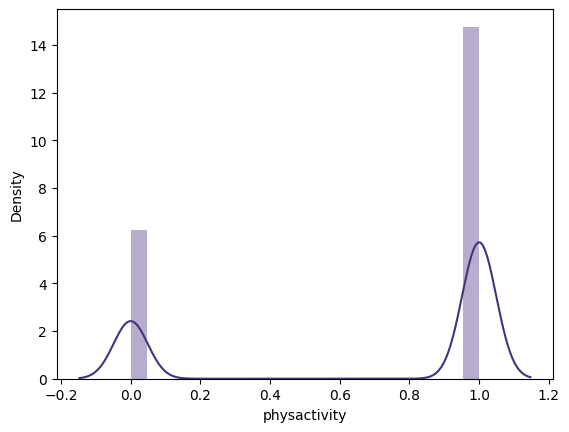

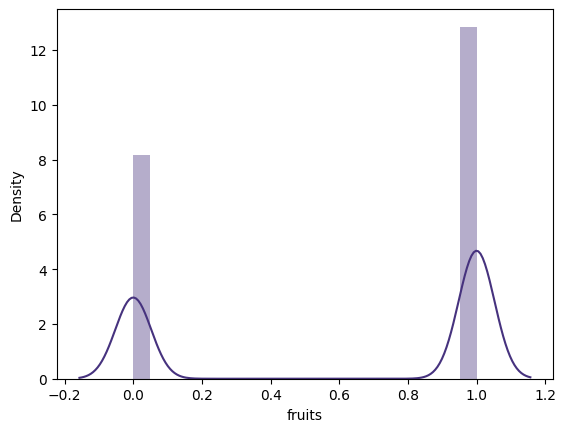

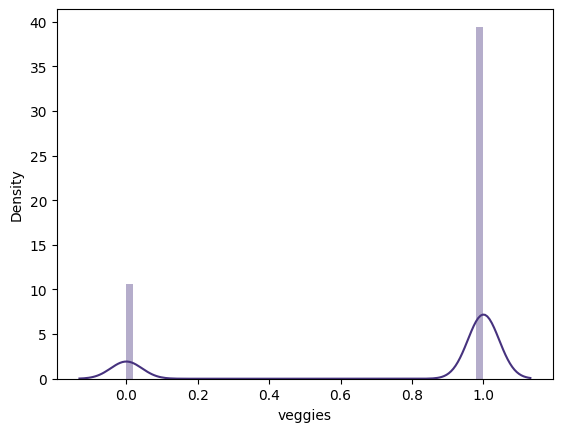

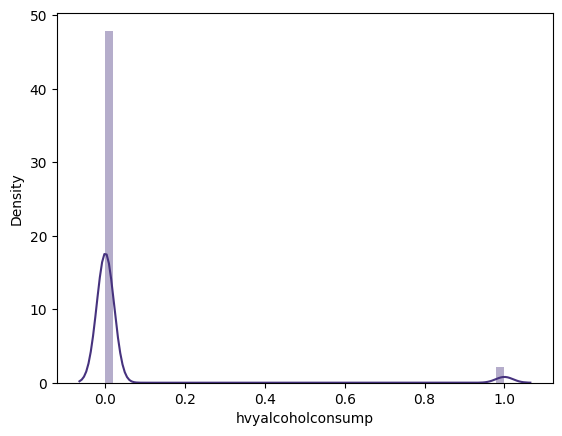

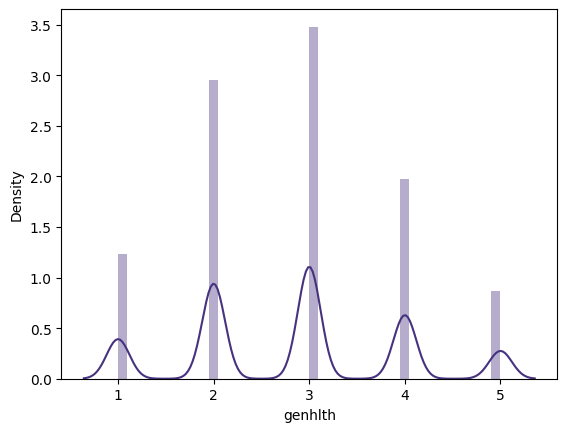

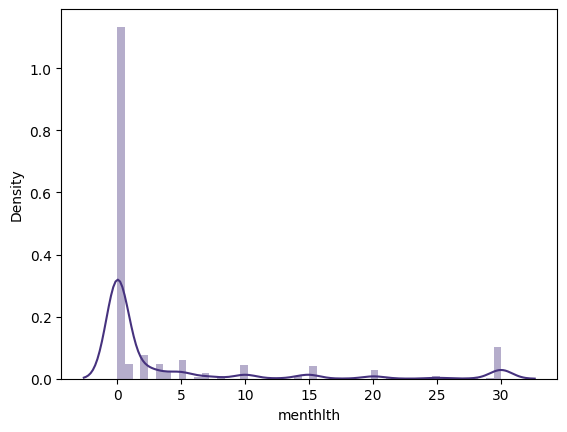

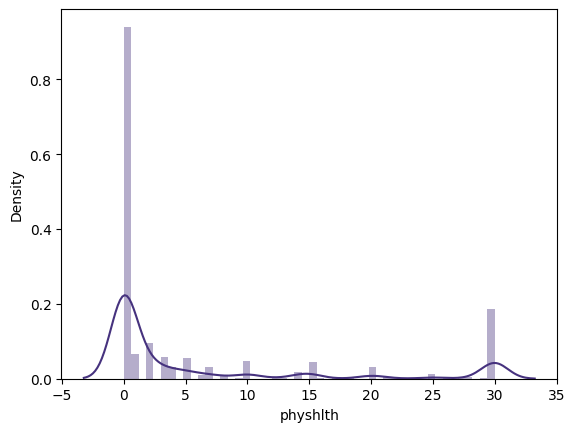

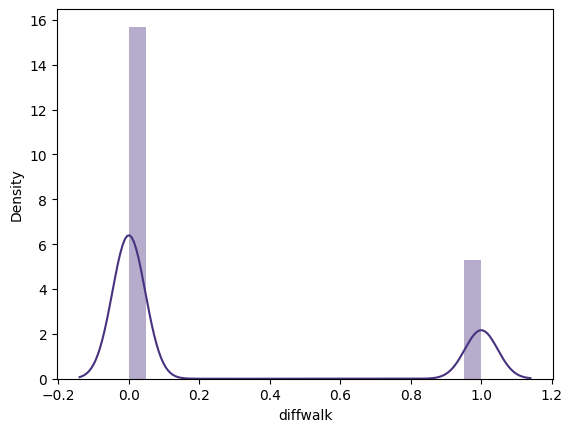

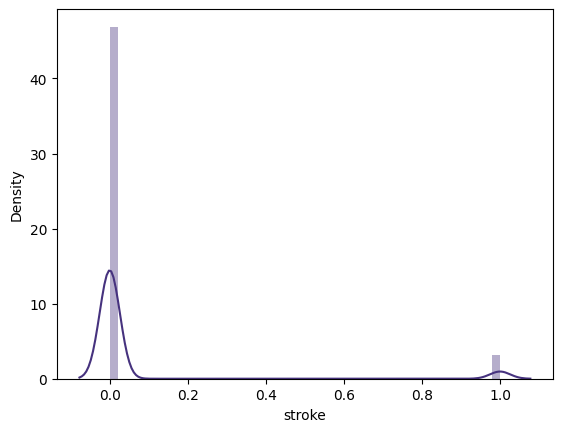

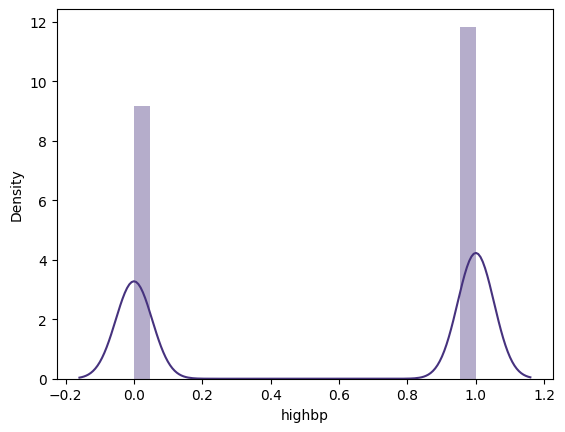

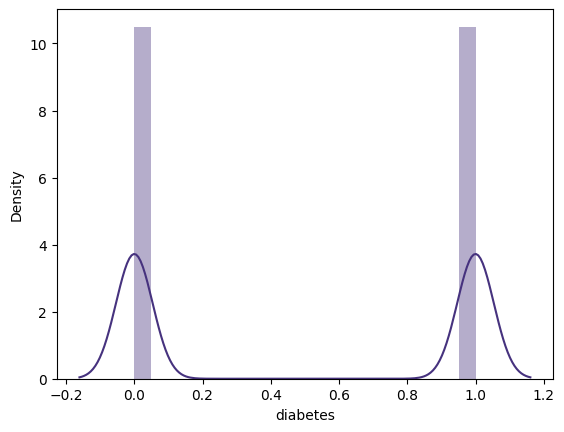

In [44]:
# General distribution plots ::

for i in diabetes.columns:
    sns.distplot(diabetes[i])
    plt.show()

## 3. EDA on Hypertension

In [45]:
hypertension

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [46]:
hypertension.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: ylabel='age'>

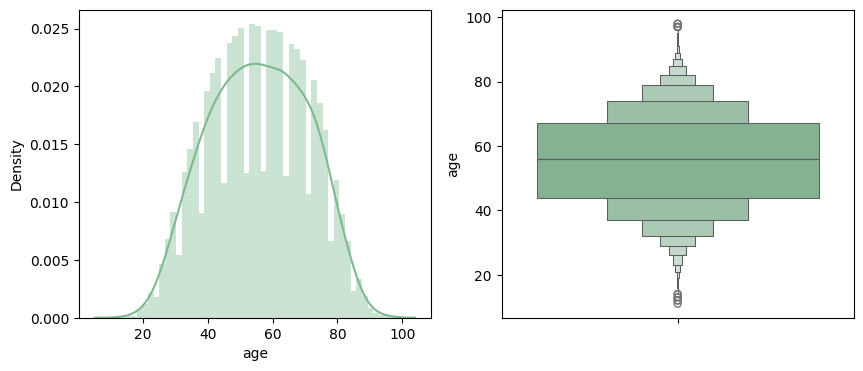

In [47]:
# Distribution of Age among the patients. 
plt.figure(figsize=(10,4))
sns.set_palette('crest')
plt.subplot(1,2,1)
sns.distplot(hypertension['age'])

plt.subplot(1,2,2)
sns.boxenplot(hypertension['age'])

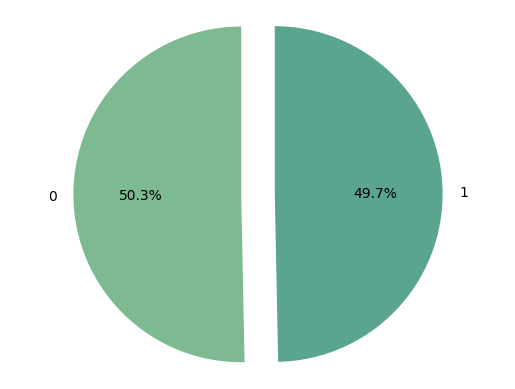

In [48]:
# Hypertension patients among ages. 

# 0 = No hypertension, 1 otherwise

hypertension_ages = hypertension.groupby('target')['age'].mean()

plt.pie(hypertension_ages, labels=hypertension_ages.index, autopct='%1.1f%%', startangle=90, explode=[0.1]*len(hypertension_ages))
plt.axis('equal') 
plt.show()

sex  target
0.0  1         7137
     0         5892
1.0  1         7137
     0         5892
Name: count, dtype: int64


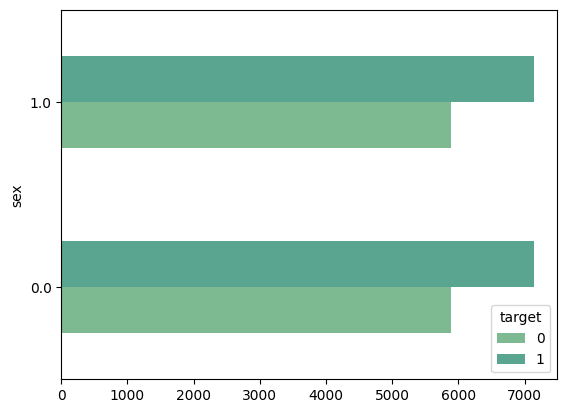

In [49]:
# Is there any difference between hypertension cases for males and females ?

hypertension.groupby('sex')['target'].value_counts().unstack(1).plot(kind='barh')
print(hypertension.groupby('sex')['target'].value_counts())

In [50]:
# The data is balanced among gender classes. 

# Distribution of Chest Pain type :: 

# Chest pain type: 0: asymptomatic 1: typical angina 2: atypical angina 3: non-anginal pain

hypertension.cp.value_counts()

cp
0    12314
2     7392
1     4456
3     1896
Name: count, dtype: int64

In [51]:
# CP type distribution among ages
# Appending age groups 

hypertension['age_group'] = pd.cut(hypertension['age'], bins=[0,20,40,80], labels=['pre-adult', 'adult', 'older'])

In [52]:
hypertension.groupby('age_group')['cp'].value_counts()

age_group  cp
pre-adult  0       28
           1       27
           2       18
           3        4
adult      0     2144
           2     1335
           1      895
           3      316
older      0     9621
           2     5700
           1     3347
           3     1491
Name: count, dtype: int64

<Axes: xlabel='cp'>

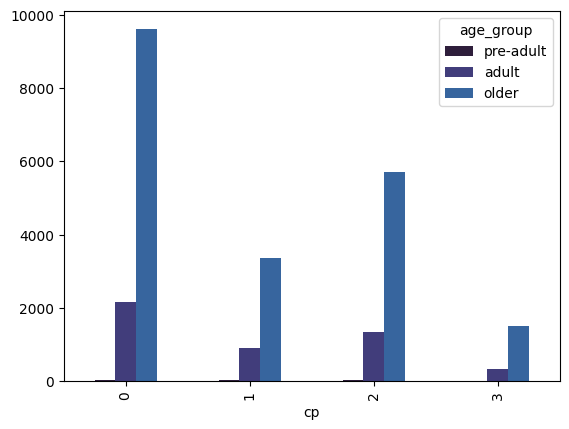

In [53]:
#visually :
sns.set_palette('mako')
hypertension.groupby('age_group')['cp'].value_counts().unstack(0).plot(kind='bar')

In [54]:
# Older age group people generaly have higher cp count. as compared to adults and pre-adults. 

# How does the resting blood pressure vary acorss types of chest pain ?

print('Average resting blood pressure is ', np.round(hypertension.trestbps.mean(),2), 'mm Hg')

Average resting blood pressure is  131.59 mm Hg


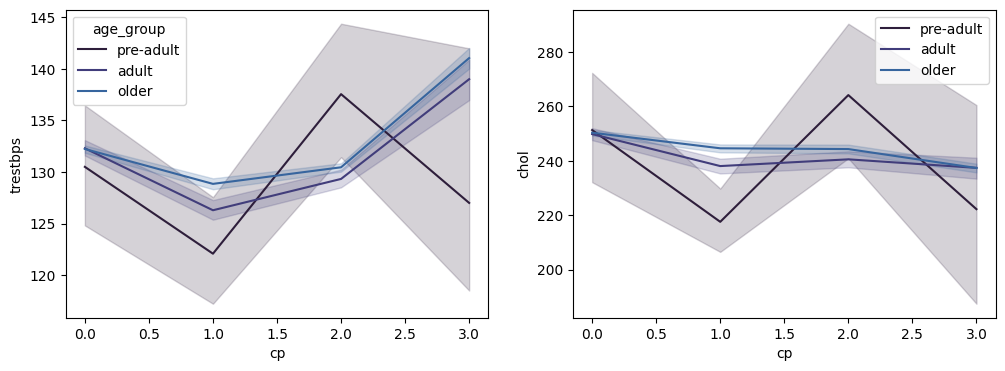

In [55]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.lineplot(x='cp', y='trestbps', hue='age_group', data=hypertension)


# CP type and its relation with cholestrol 
plt.subplot(1,2,2)
sns.lineplot(x='cp', y='chol', hue='age_group', data=hypertension)

plt.legend()
plt.show()

In [56]:
# Unlike pre-adults, the other two groups have correlative progression of resting blood pressure 

# Similar trend with cholestrol levels as well. 


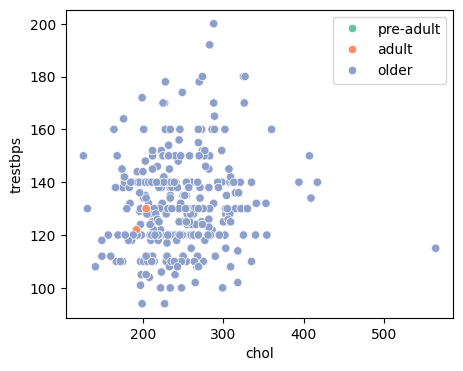

In [57]:

# What is the relation between cholestrol levels and resting blood pressure then ?

plt.figure(figsize=(5,4))
sns.scatterplot(x='chol', y='trestbps', hue='age_group',palette='Set2', data=hypertension)
plt.legend()
plt.show()

In [58]:
# what is fasting blood sugar distribution 
# if the patient's fasting blood sugar > 120 mg/dl (1: yes; 0: no) by age

age_group  fbs
pre-adult  0         64
           1         13
adult      0       3974
           1        716
older      0      17135
           1       3024
Name: count, dtype: int64


<Axes: xlabel='fbs'>

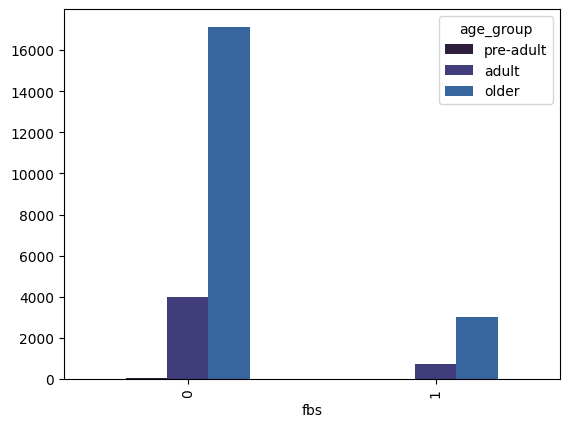

In [59]:
# values ::
print(hypertension.groupby('age_group')['fbs'].value_counts())
hypertension.groupby('age_group')['fbs'].value_counts().unstack(0).plot(kind='bar')

In [60]:
hypertension



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1,older
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1,older
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1,older
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1,older
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1,older
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0,older
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0,older
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0,older
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0,older


In [61]:
# Maximum heart rate achieved for people suffered hypertension or not and their percentage

hypertension.groupby('target')['thalach'].mean()

target
0    139.075866
1    158.367101
Name: thalach, dtype: float64

In [62]:
suffered = hypertension[hypertension['target'] == 1].thalach
print(suffered.max(), suffered.min(), np.round(suffered.mean(), 2))

202 96 158.37


In [63]:
not_suffered = hypertension[hypertension['target'] == 0].thalach
print(not_suffered.max(), not_suffered.min(), np.round(not_suffered.mean(), 2))

195 71 139.08


In [64]:
# comparing maximum, minimum and average, it is clear that people who have suffered hypertension have
# a higher heart rate in general. 

((np.round(suffered.mean(), 2) - np.round(not_suffered.mean(), 2) )/ np.round(not_suffered.mean(), 2) )*100

13.869715271786015

In [65]:
# Average heart rate of people suffering hypertension is approximately 14% more than others. 


In [66]:
# Similarly comparing and calculating difference in cholestrol level and resting blood pressure. 

# For cholestrol levels ::

suffered = hypertension[hypertension['target'] == 1].chol
not_suffered = hypertension[hypertension['target'] == 0].chol
print(suffered.max(), suffered.min(), np.round(suffered.mean(), 2))

564 126 242.39


In [67]:
print(not_suffered.max(), not_suffered.min(), np.round(not_suffered.mean(), 2))

409 131 251.01


In [68]:
((np.round(not_suffered.mean(), 2) - np.round(suffered.mean(), 2)) / np.round(suffered.mean(), 2)) * 100

3.5562523206402927

In [69]:
# Average cholestrol level in people not suffering hypertension is 3% lower than people who suffer. 



In [70]:

# For resting blood pressure:

suffered = hypertension[hypertension['target'] == 1].trestbps
not_suffered = hypertension[hypertension['target'] == 0].trestbps



In [71]:
print(suffered.max(), suffered.min(), np.round(suffered.mean(), 2))

180 94 129.22


In [72]:
print(not_suffered.max(), not_suffered.min(), np.round(not_suffered.mean(), 2))

200 100 134.47


In [73]:
((np.round(not_suffered.mean(), 2) - np.round(suffered.mean(), 2)) / np.round(suffered.mean(), 2)) * 100

4.062838569880824

In [74]:
# Average resting blood pressure in people who do not suffer hypertension is 4% lower than others. 




In [75]:
# Exercise induced angina (exang) and ST depression induced by exercise relative to rest. (oldpeak)

# exang 0 = no, 1 otherwise. 

hypertension.exang.value_counts()

exang
0    17540
1     8518
Name: count, dtype: int64

In [76]:
hypertension.groupby('exang')['oldpeak'].mean()

exang
0    0.804401
1    1.524348
Name: oldpeak, dtype: float64

<Axes: xlabel='exang', ylabel='oldpeak'>

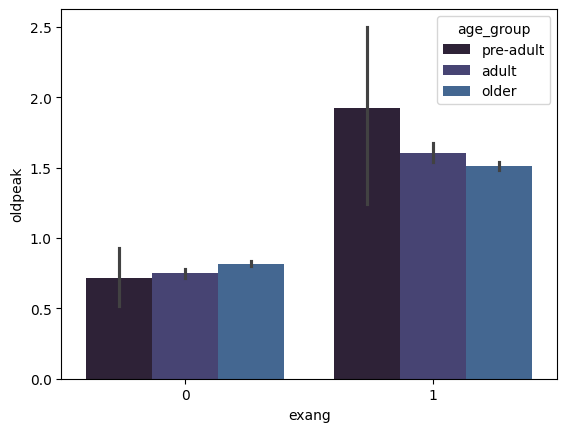

In [77]:
sns.barplot(x = hypertension['exang'], y = hypertension['oldpeak'], hue = hypertension['age_group'])

## EDA on Stroke

In [78]:
stroke

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [79]:
stroke.columns = stroke.columns.str.lower()

In [80]:
stroke.columns


Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [81]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40907 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40907 non-null  float64
 2   hypertension       40907 non-null  int64  
 3   heart_disease      40907 non-null  int64  
 4   ever_married       40907 non-null  int64  
 5   work_type          40907 non-null  int64  
 6   residence_type     40907 non-null  int64  
 7   avg_glucose_level  40907 non-null  float64
 8   bmi                40907 non-null  float64
 9   smoking_status     40907 non-null  int64  
 10  stroke             40907 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


In [82]:
len(stroke[stroke['age'] < 0])

58

In [83]:
# 58 samples in the dataset have age values in negative numbers which is incorrect

# filtering out these negative values.

stroke = stroke[stroke['age'] > 0]

<Axes: ylabel='age'>

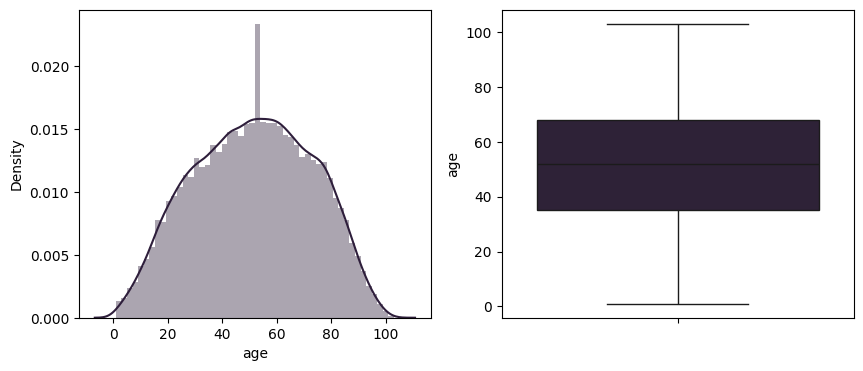

In [84]:
# Distribution of age in the dataset. 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(stroke['age'])
plt.subplot(1,2,2)
sns.boxplot(stroke['age'])

In [85]:
# Minimum and maximum age of person suffered stroke
print('minimum age ', stroke[stroke['stroke'] == 1].age.min(), 'maximum age ', stroke[stroke['stroke'] == 1].age.max())

minimum age  1.0 maximum age  103.0


In [86]:
# To compare the symptoms and conditions, creating copies of 'stroke' data as suffered and not_suffered categories 

# by convention, suffred_stroke represents samples who have had target = 1, and 0 for not_suffered_stroke.

In [87]:
suffered_stroke = stroke[stroke['stroke'] == 1]
not_suffered_stroke = stroke[stroke['stroke'] == 0]

<Axes: xlabel='age', ylabel='Density'>

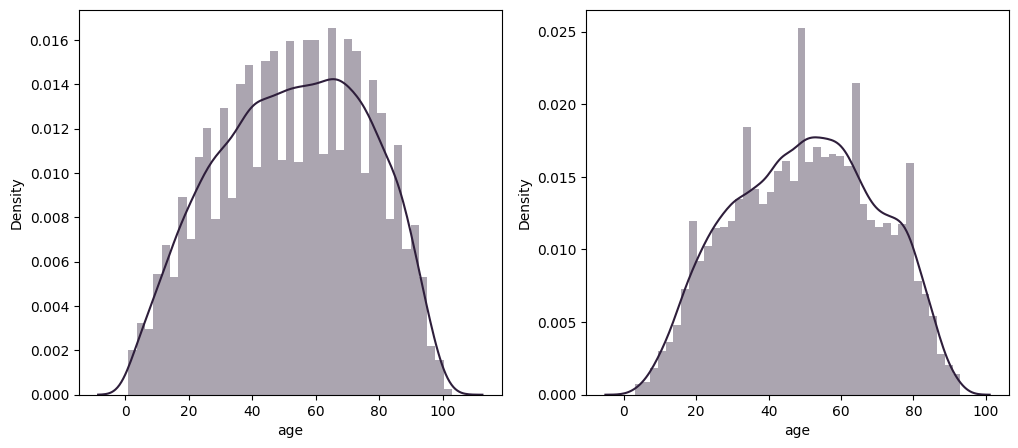

In [88]:
# Age distribution of those who have had stroke and not, side by side. 
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(suffered_stroke['age'])

plt.subplot(1,2,2)
sns.distplot(not_suffered_stroke['age'])

<Axes: xlabel='smoking_status'>

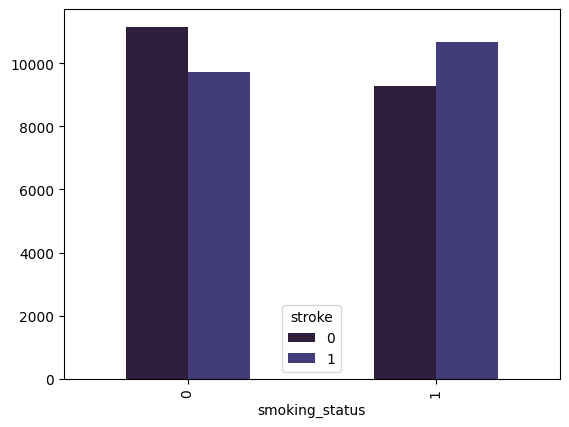

In [89]:
# smoking status 

stroke.groupby('smoking_status')['stroke'].value_counts().unstack(1).plot(kind='bar')

In [90]:
# Average bmi of both categories and comparison

print('Average BMI of suffered ',np.round(suffered_stroke.bmi.mean(),2),'for not suffered ',np.round(not_suffered_stroke.bmi.mean(),2))

Average BMI of suffered  30.53 for not suffered  30.28


In [91]:
# On an average there is no considerable difference in BMI for poeple having stroke or not. 

# average glucose levels.

print('Average glucose of suffered ',np.round(suffered_stroke.avg_glucose_level.mean(),2),'for not suffered ',np.round(not_suffered_stroke.avg_glucose_level.mean(),2))

Average glucose of suffered  137.38 for not suffered  106.8


In [92]:
# percentage difference in glucose levels


# (average of not suffered - average of suffered / average of not suffered) *100

print(np.round((np.round(suffered_stroke.avg_glucose_level.mean(),2) - np.round(not_suffered_stroke.avg_glucose_level.mean(),2)) /np.round(suffered_stroke.avg_glucose_level.mean(),2) ,2) *100)

22.0


In [93]:
# The expression result shows us that the people who have suffered stroke have 22 % higher glucose levels 
# than that of normal people. 

# what are the other things influenced by this trend ??



work_type  stroke
0          0          96.205059
1          0         101.688910
2          0         107.491047
           1         145.812025
3          0         113.894120
           1         122.387545
4          0         104.904415
           1         142.438003
Name: avg_glucose_level, dtype: float64


<Axes: xlabel='work_type', ylabel='avg_glucose_level'>

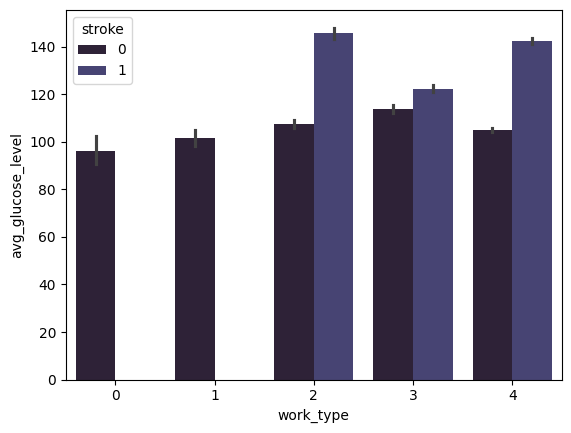

In [94]:
print(stroke.groupby(['work_type','stroke'])['avg_glucose_level'].mean())
sns.barplot(x= 'work_type', y = 'avg_glucose_level', hue='stroke', data=stroke)


In [95]:
# values evidently show that for the work types 0 and 1 there are no stroke counts glucose level is also lesser.
# the data description notes that work types are as follows :

# 0 - Never_worked, 1 - children, 2 - Govt_job, 3 - Self-employed, 4 - Private

# on the other hand, the other work types are having stroke counts with higher glucose level as well.


In [96]:
# what of residence type ?? 1: rural, 0: Urban

# First looking for a relation in work type and relation type not including children and never worked.


ls = [2,3,4]

working = stroke[stroke['work_type'].isin(ls)]

working.groupby('work_type')['residence_type'].value_counts()

work_type  residence_type
2          1                  2891
           0                  2689
3          1                  4761
           0                  4456
4          1                 13061
           0                 12452
Name: count, dtype: int64

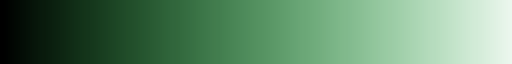

In [97]:
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

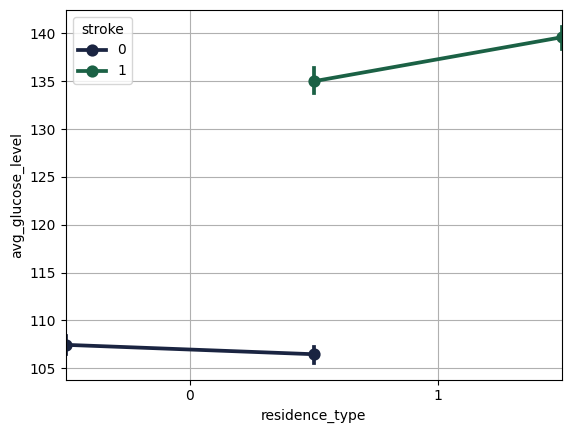

In [98]:
# across all the work categories in general, people tend to live more in rural areas than in urban. 

# Now relation between residenc type and glucose levels as per stroke conditions. 
sns.set_palette('cubehelix')
sns.pointplot(x = 'residence_type', y='avg_glucose_level', hue='stroke', data=working, dodge=1)
plt.grid()

In [99]:

# Residence type correlates to the type of work, leading to higher glucose level in general for urban areas
# leading to higher risk of stroke. 


In [100]:

# History of heart disease relation to occurance of stroke. 

# 1 = had heart disease, 0 = No heart disease.  


In [101]:
( len(stroke[stroke['heart_disease'] == 1]) / len(stroke) )*100

12.763924949786901

In [102]:
# average data distribution recorded that out of the dataset, only 12% had heart disease history. 



stroke[stroke['heart_disease'] == 1].stroke.value_counts()

stroke
1    4128
0    1083
Name: count, dtype: int64

In [103]:
(len(stroke[(stroke['heart_disease'] == 1) & (stroke['stroke'] == 1)]) / len(stroke[stroke['heart_disease'] == 1]))*100

79.21704087507196

<Axes: ylabel='heart_disease'>

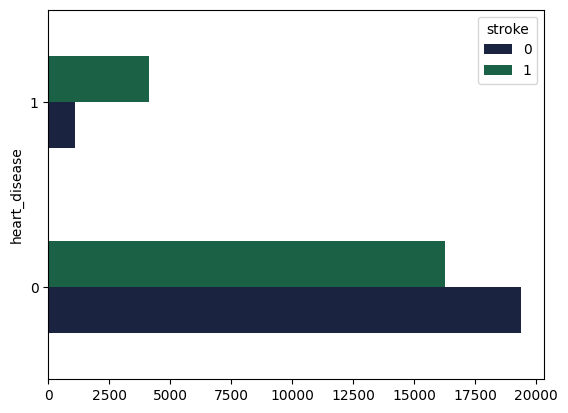

In [104]:
# out of these 12%, almost 80% people faced stroke. 

# This shows that having a heart disease history, directly correlates to risk of stroke
# with about 80% positivity. (as per the data statistics)

# visually,

stroke.groupby('heart_disease')['stroke'].value_counts().unstack(1).plot(kind='barh')

In [105]:
suffered_stroke.ever_married.value_counts()

ever_married
1    18159
0     2220
Name: count, dtype: int64

In [106]:
not_suffered_stroke.ever_married.value_counts()

ever_married
1    15370
0     5077
Name: count, dtype: int64

In [107]:
# the collected data is evenly divided between people who have suffered stroke or not. both classes
# having around 20000 samples. 

# comparitively, it can be seen that people who have suffered stroke, have a higher number of
# married individuals as compared to those who have not suffered stroke. 

# percentage terms, 

print('For people who have suffered stroke ',np.round((len(suffered_stroke[suffered_stroke['ever_married'] == 1]) / len(suffered_stroke)) *100,2), '% are married')

For people who have suffered stroke  89.11 % are married


In [108]:
print('For people who have not suffered stroke, ', np.round((len(not_suffered_stroke[not_suffered_stroke['ever_married'] == 1]) / len(not_suffered_stroke)) * 100, 2), '% are married.')


For people who have not suffered stroke,  75.17 % are married.


In [109]:
len(suffered_stroke)

20379

In [110]:
len(not_suffered_stroke)

20447

## End of EDA

In [111]:
##################################################################################################################

## Feature Engineering and Finalizing Datasets.

In [112]:
#1. Diabetes dataset. 

diabetes

,age,sex,highchol,cholcheck,bmi,smoker,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,genhlth,menthlth,physhlth,diffwalk,stroke,highbp,diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [113]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   70692 non-null  float64
 1   sex                   70692 non-null  float64
 2   highchol              70692 non-null  float64
 3   cholcheck             70692 non-null  float64
 4   bmi                   70692 non-null  float64
 5   smoker                70692 non-null  float64
 6   heartdiseaseorattack  70692 non-null  float64
 7   physactivity          70692 non-null  float64
 8   fruits                70692 non-null  float64
 9   veggies               70692 non-null  float64
 10  hvyalcoholconsump     70692 non-null  float64
 11  genhlth               70692 non-null  float64
 12  menthlth              70692 non-null  float64
 13  physhlth              70692 non-null  float64
 14  diffwalk              70692 non-null  float64
 15  stroke             

In [114]:
# The dataset is in good modeling condition, does not require extensive feature engineering.

# checking for multi-collinearity. 



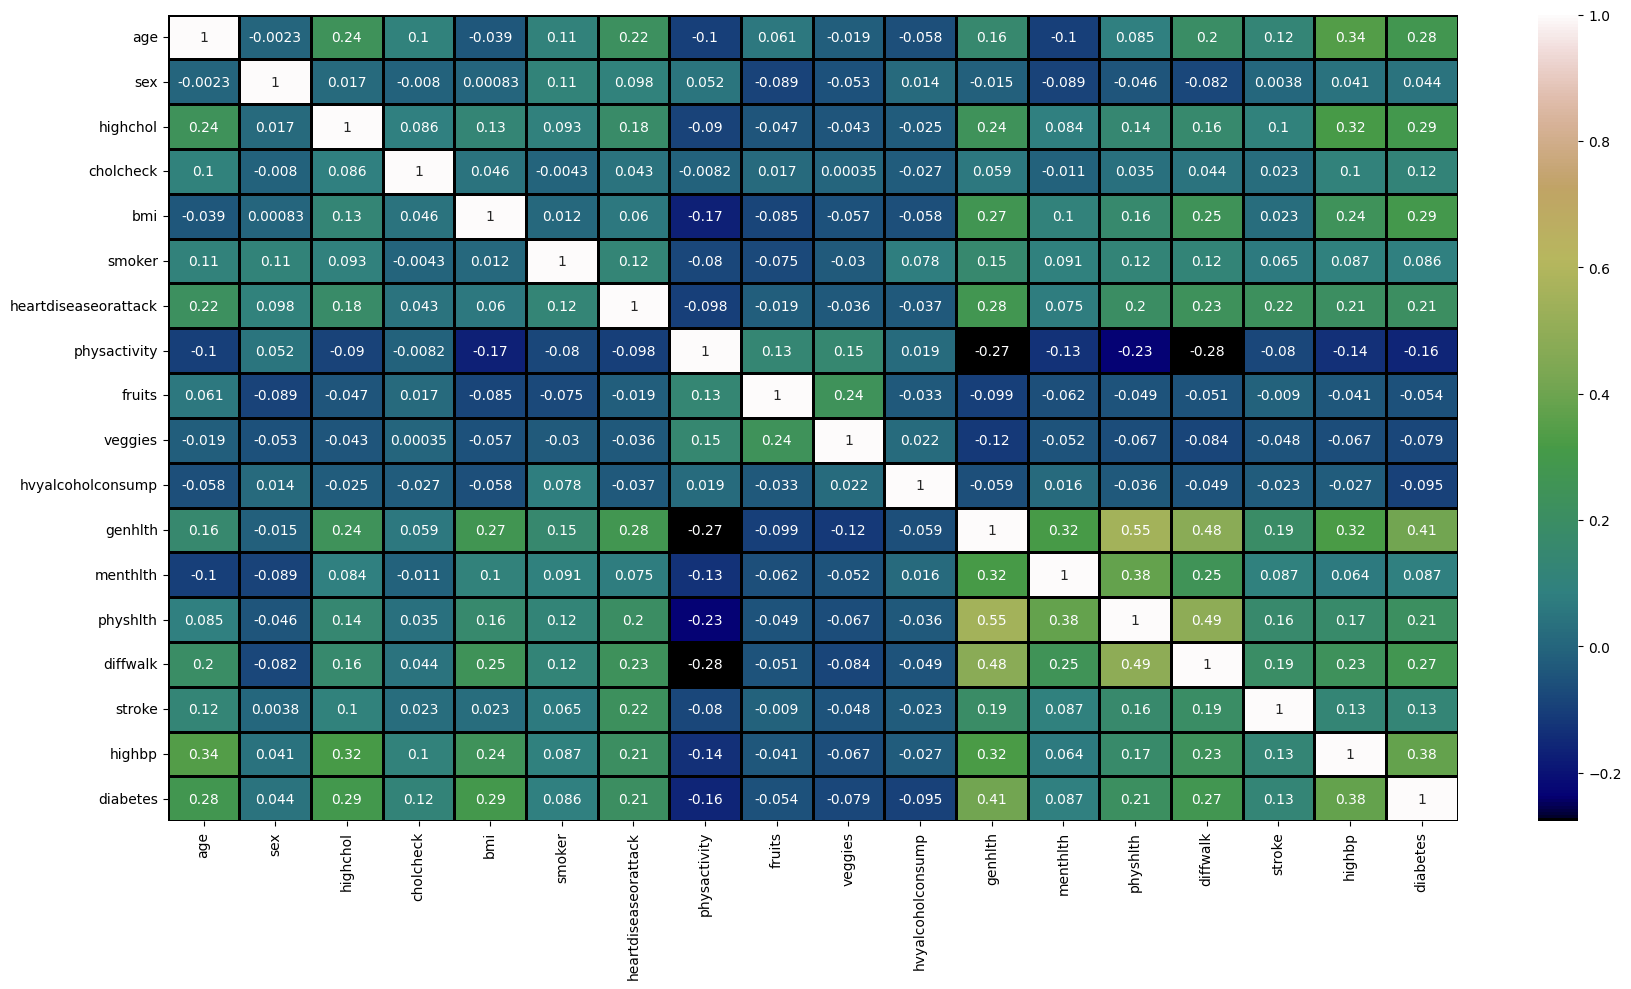

In [115]:
plt.figure(figsize=(18,10))
sns.heatmap(diabetes.corr(), annot=True, linecolor='black', linewidths=1, cmap = 'gist_earth')
plt.tight_layout()
plt.show()

In [116]:
# physical health and general health have 0.55 collinearity 
# general health coveys better collinearity to target variable diabetes than physical health. 

# so safely dropping out physhlth

diabetes.drop(columns=['physhlth'], inplace=True, axis=1)

In [117]:
#2. Hypertension Dataset


In [118]:
hypertension

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1,older
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1,older
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1,older
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1,older
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1,older
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0,older
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0,older
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0,older
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0,older


In [119]:
# as the target is binary, the goal is to keep the other values as small as possible to avoid bias in the ml models.

# in hypertension dataset, removing age column then Label encoding age group (created using age.)

hypertension.drop(columns=['age'], inplace=True, axis=1)

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

hypertension['age_group'] = encoder.fit_transform(hypertension['age_group'])

# Dropping age group string column. 



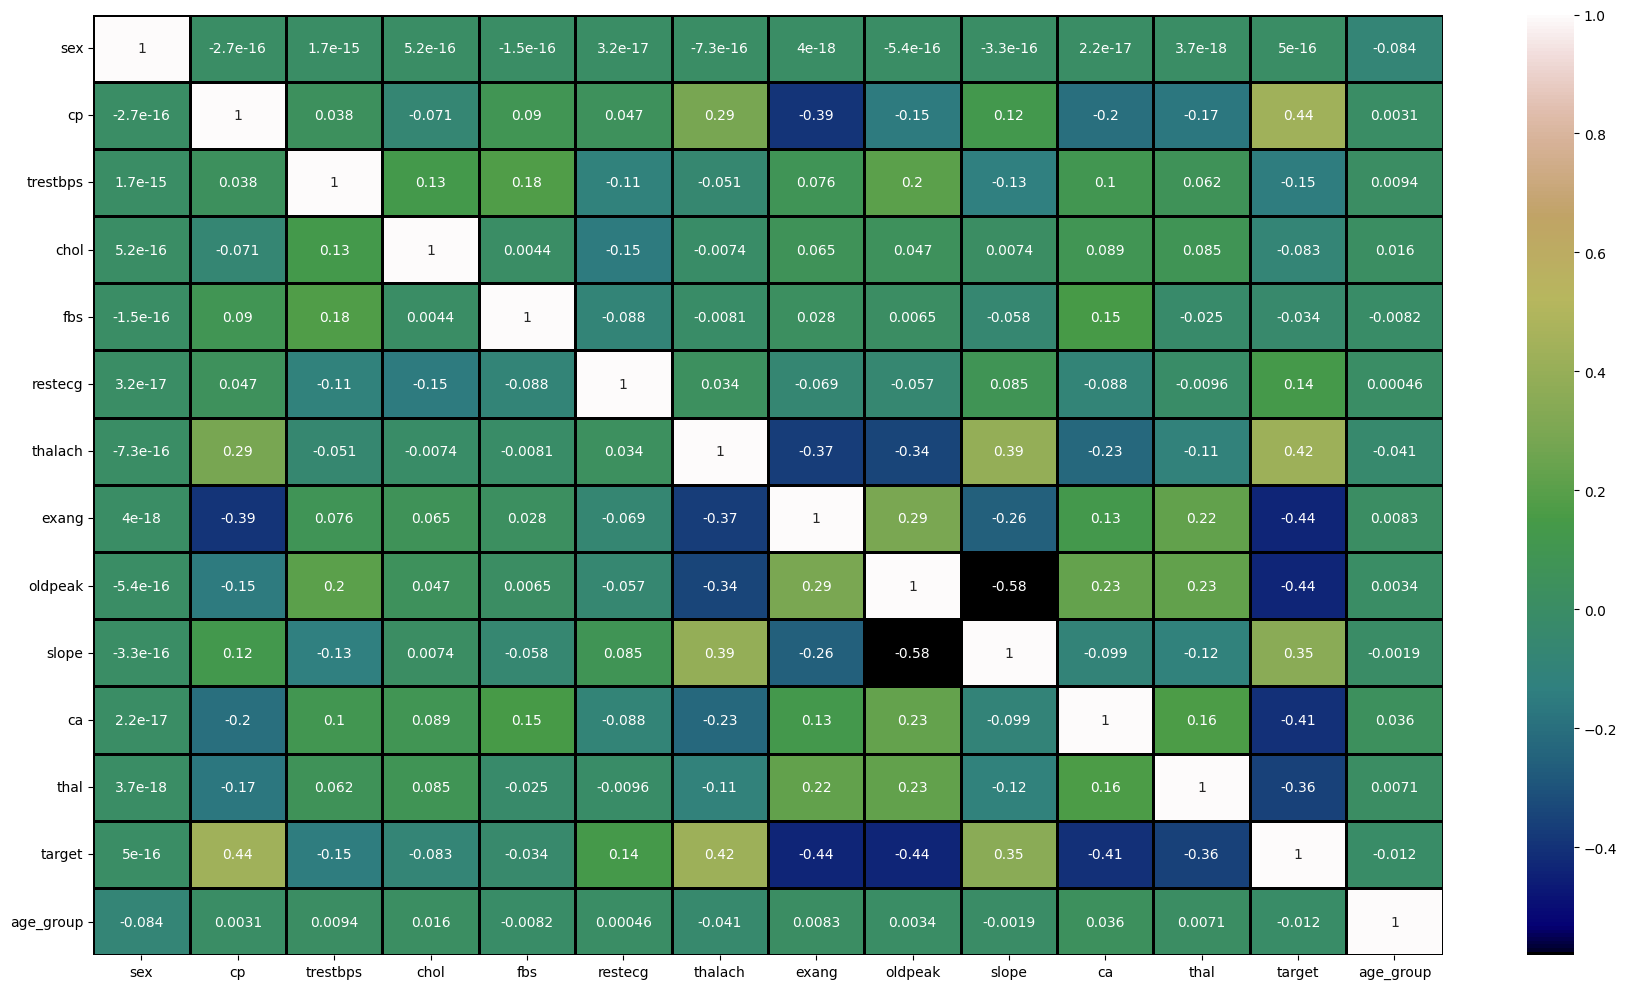

In [120]:
# Checking for multicollinearity. 

plt.figure(figsize=(18,10))
sns.heatmap(hypertension.corr(), annot=True, linecolor='black', linewidths=1, cmap = 'gist_earth')
plt.tight_layout()
plt.show()

In [121]:
# There is no significant multi-collinearity seen in the dataset other than oldpeak that shows high negative. 
# to the target variable hence dropping:

hypertension.drop(columns=['oldpeak'], inplace=True, axis=1)

In [122]:
# Uniform-Scaling the dataset using StandardScaler will be done after feature and target separation in the 
# ML modeling part. 




In [123]:
#3. Stroke Dataset. 

stroke

,sex,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [124]:
# similarly, diving the age of individuals into groups

stroke['age_group'] = pd.cut(stroke['age'], bins = [0,20,40,60,80,105], labels = [0,1,2,3,4])

In [125]:
# removing age column :

stroke.drop(columns=['age'], inplace=True, axis=1)

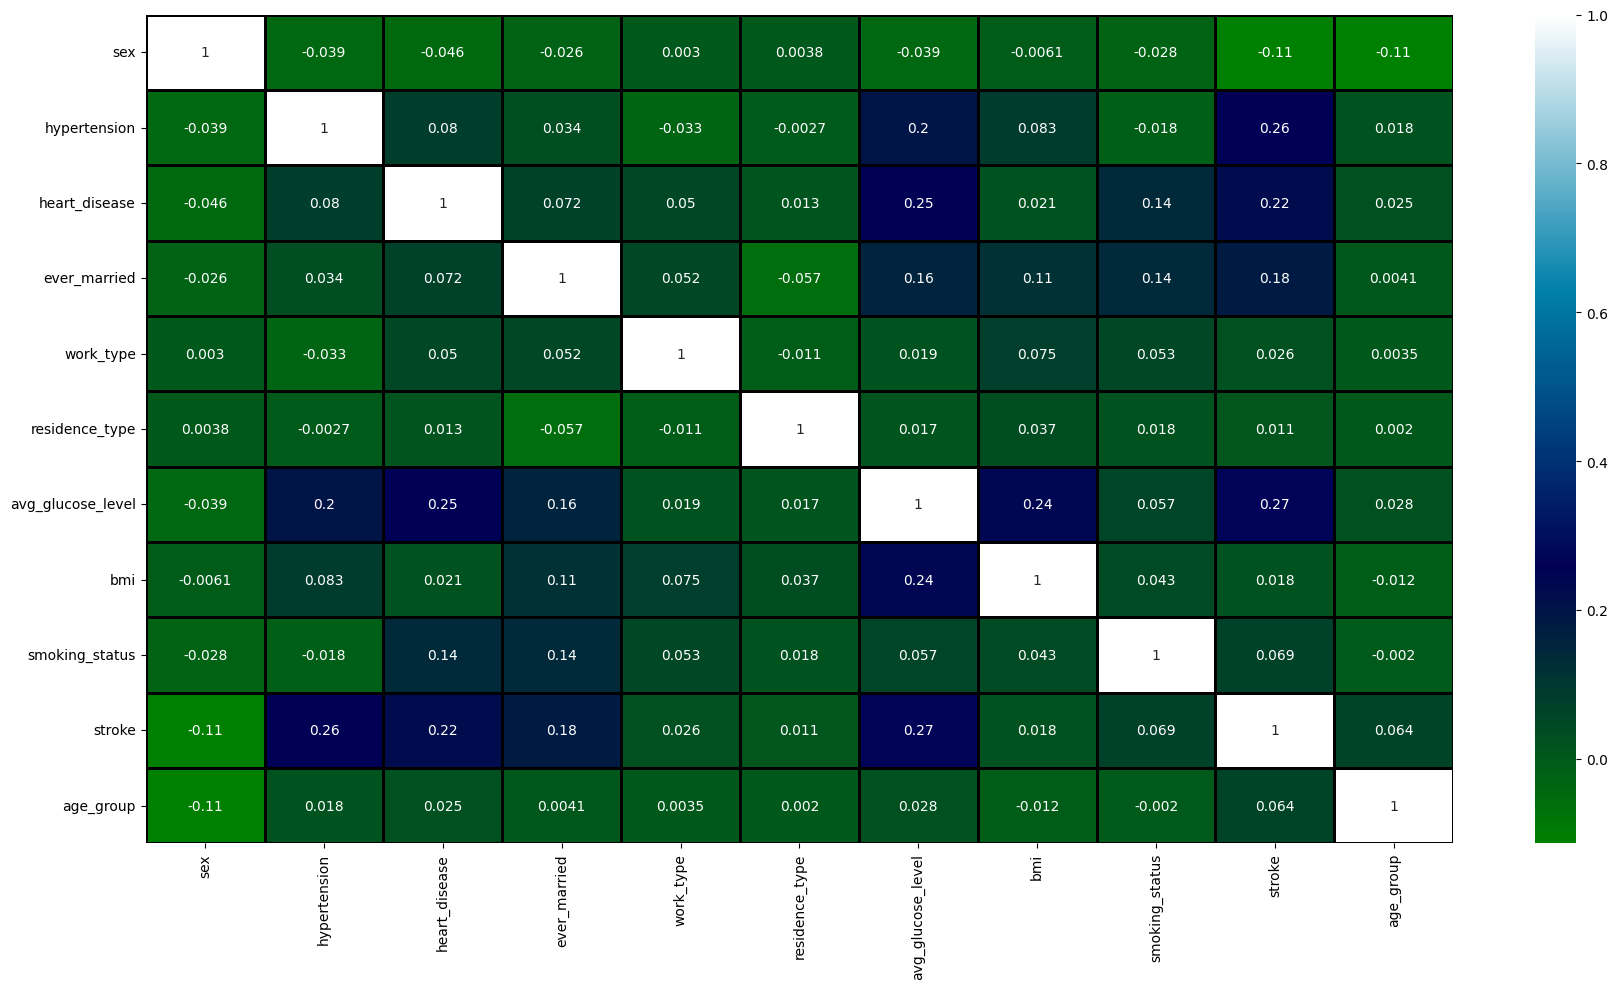

In [126]:
# checking multi-collinearity

plt.figure(figsize=(18,10))
sns.heatmap(stroke.corr(), annot=True, linecolor='black', linewidths=1, cmap = 'ocean')
plt.tight_layout()
plt.show()

In [127]:
# No significant multi-collinearity. 

# Standrization will be done during ML modeling for the dataset has different scale values. 



## ML modeling 

In [128]:
# All three datasets, the target variable is binary, (Binary classification problem )


# Importing classifier models to be used. 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initializing base models

logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
grad_boost = GradientBoostingClassifier()



In [129]:
models = [logistic_regression, knn, svc, decision_tree, random_forest, grad_boost]

In [130]:
# Importing accuracy_metrics to be used. 

from sklearn.metrics import accuracy_score, classification_report

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
#1. Diabetes 

# Target feature separation

y = diabetes.pop('diabetes')
x = diabetes 

# train test splitting:

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.75, random_state=42)

# Defining model gallery:

names = ['diabetes_logistic_regression', 'diabetes_knn', 'diabetes_svc', 'diabetes_decision_tree',
         'diabetes_random_forest', 'diabetes_grad_boost']

gallery = dict(zip(names, models))

# Defining separate dictionaries to store training and testing accuracy scores

diabetes_training_scores = {}
diabetes_testing_scores = {}
diabetes_classification_reports = {}

for name,model in gallery.items():
    
    ml_model = model
    ml_model.fit(x_train,y_train) # training iteratively
    
    diabetes_training_scores[name] = np.round(accuracy_score(y_train, ml_model.predict(x_train)),2)
    diabetes_testing_scores[name] = np.round(accuracy_score(y_test, ml_model.predict(x_test)),2)
    diabetes_classification_reports[name] = classification_report(y_test, ml_model.predict(x_test))

print(diabetes_training_scores)
print(diabetes_testing_scores)


# The code is iteratively training models and storing the results in dicts hence runs slow. 

{'diabetes_logistic_regression': 0.75, 'diabetes_knn': 0.8, 'diabetes_svc': 0.75, 'diabetes_decision_tree': 0.96, 'diabetes_random_forest': 0.96, 'diabetes_grad_boost': 0.75}
{'diabetes_logistic_regression': 0.74, 'diabetes_knn': 0.71, 'diabetes_svc': 0.75, 'diabetes_decision_tree': 0.66, 'diabetes_random_forest': 0.72, 'diabetes_grad_boost': 0.75}


In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [134]:
#2. Hypertension ::


# Target feature separation

y = hypertension.pop('target')
x = hypertension

# Scaling the features. 

x[x.columns] = scaler.fit_transform(x[x.columns])

# train test splitting:

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.75, random_state=42)

# Defining model gallery:

names = ['hypertension_logistic_regression', 'hypertension_knn', 'hypertension_svc', 'hypertension_decision_tree',
         'hypertension_random_forest', 'hypertension_grad_boost']

gallery = dict(zip(names, models))

# Defining separate dictionaries to store training and testing accuracy scores

hypertension_training_scores = {}
hypertension_testing_scores = {}
hypertension_classification_reports = {}

for name,model in gallery.items():
    
    ml_model = model
    ml_model.fit(x_train,y_train) # training iteratively
    
    hypertension_training_scores[name] = np.round(accuracy_score(y_train, ml_model.predict(x_train)),2)
    hypertension_testing_scores[name] = np.round(accuracy_score(y_test, ml_model.predict(x_test)),2)
    hypertension_classification_reports[name] = classification_report(y_test, ml_model.predict(x_test))

print(hypertension_training_scores)
print(hypertension_testing_scores)


{'hypertension_logistic_regression': 0.83, 'hypertension_knn': 1.0, 'hypertension_svc': 0.98, 'hypertension_decision_tree': 1.0, 'hypertension_random_forest': 1.0, 'hypertension_grad_boost': 0.96}
{'hypertension_logistic_regression': 0.83, 'hypertension_knn': 1.0, 'hypertension_svc': 0.97, 'hypertension_decision_tree': 1.0, 'hypertension_random_forest': 1.0, 'hypertension_grad_boost': 0.96}


In [135]:
# 3. Stroke

# Target feature separation

y = stroke.pop('stroke')
x = stroke

# Scaling the features. 

x[x.columns] = scaler.fit_transform(x[x.columns])

# train test splitting:

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.75, random_state=42)

# Defining model gallery:

names = ['stroke_logistic_regression', 'stroke_knn', 'stroke_svc', 'stroke_decision_tree',
         'stroke_random_forest', 'stroke_grad_boost']

gallery = dict(zip(names, models))

# Defining separate dictionaries to store training and testing accuracy scores

stroke_training_scores = {}
stroke_testing_scores = {}
stroke_classification_reports = {}

for name,model in gallery.items():
    
    ml_model = model
    ml_model.fit(x_train,y_train) # training iteratively
    
    stroke_training_scores[name] = np.round(accuracy_score(y_train, ml_model.predict(x_train)),2)
    stroke_testing_scores[name] = np.round(accuracy_score(y_test, ml_model.predict(x_test)),2)
    stroke_classification_reports[name] = classification_report(y_test, ml_model.predict(x_test))

print(stroke_training_scores)
print(stroke_testing_scores)

{'stroke_logistic_regression': 0.69, 'stroke_knn': 0.94, 'stroke_svc': 0.78, 'stroke_decision_tree': 1.0, 'stroke_random_forest': 1.0, 'stroke_grad_boost': 0.81}
{'stroke_logistic_regression': 0.68, 'stroke_knn': 0.91, 'stroke_svc': 0.78, 'stroke_decision_tree': 1.0, 'stroke_random_forest': 1.0, 'stroke_grad_boost': 0.8}


## Model comparisons 

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay

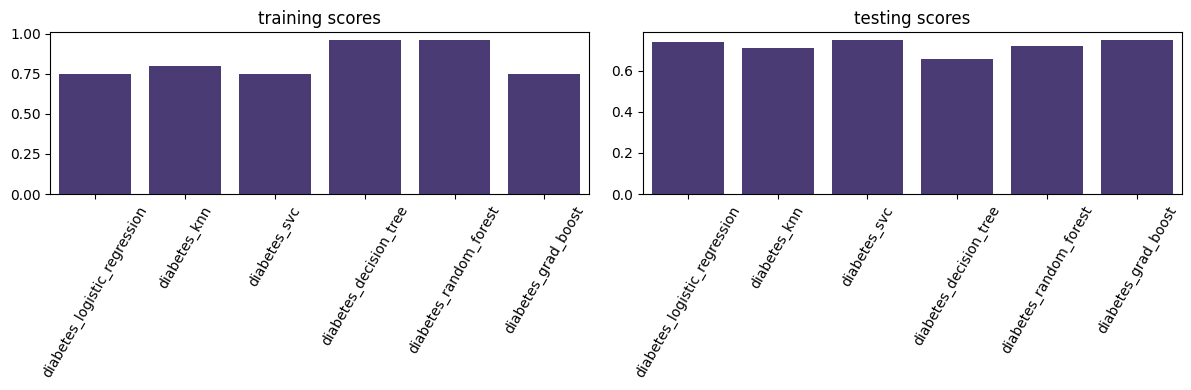

In [137]:

#1. Diabetes models. # Training and testing accuracies side by side. 

sns.set_palette('viridis')

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(x = diabetes_training_scores.keys(), y = diabetes_training_scores.values())
plt.title('training scores')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
sns.barplot(x = diabetes_testing_scores.keys(), y = diabetes_testing_scores.values())
plt.title('testing scores')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()


In [138]:
# values :: 

max_key = max(diabetes_training_scores, key=diabetes_training_scores.get)
max_value = diabetes_training_scores[max_key]

print('Maximum training accuracy ',max_value, ' achieved by ' , max_key) 

Maximum training accuracy  0.96  achieved by  diabetes_decision_tree


In [139]:
max_key = max(diabetes_testing_scores, key=diabetes_testing_scores.get)
max_value = diabetes_testing_scores[max_key]

print('Maximum testing accuracy ',max_value, ' achieved by ' , max_key) 

Maximum testing accuracy  0.75  achieved by  diabetes_svc


In [140]:
# training accuracy of svc ::
print(diabetes_training_scores['diabetes_svc'])

0.75


In [141]:
# Although decision tree model gets high accuracy in training, it has low accuracy in testing which
# indicates overfitting . 

# On the other hand, Support Vector classifier performs with optimal accuracy on both train and test. 

# Finalizing Support vector classifier for Diabetes Dataset. 



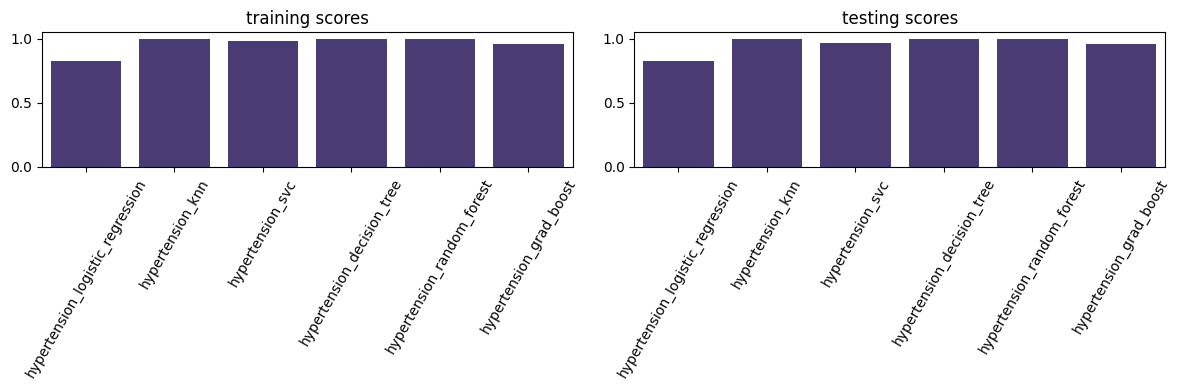

In [142]:
# 2.Hypertension


plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(x = hypertension_training_scores.keys(), y = hypertension_training_scores.values())
plt.title('training scores')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
sns.barplot(x = hypertension_testing_scores.keys(), y = hypertension_testing_scores.values())
plt.title('testing scores')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [143]:
# Values ::

max_key = max(hypertension_training_scores, key=hypertension_training_scores.get)
max_value = hypertension_training_scores[max_key]

print('Maximum training accuracy ',max_value, ' achieved by ' , max_key) 

Maximum training accuracy  1.0  achieved by  hypertension_knn


In [144]:
max_key = max(hypertension_testing_scores, key=hypertension_testing_scores.get)
max_value = hypertension_testing_scores[max_key]

print('Maximum testing accuracy ',max_value, ' achieved by ' , max_key) 

Maximum testing accuracy  1.0  achieved by  hypertension_knn


In [145]:
# For hypertension, KNN shows highest training and testing accuracy, however, 100% accuracy is not feasible
# Instead it is feasible to finalize a more genralized performing model  that is svc or Gradient Boosting classifier. 



In [146]:
print(hypertension_classification_reports['hypertension_svc'])
print(hypertension_classification_reports['hypertension_grad_boost'])


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2919
           1       0.97      0.98      0.98      3596

    accuracy                           0.97      6515
   macro avg       0.98      0.97      0.97      6515
weighted avg       0.97      0.97      0.97      6515

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2919
           1       0.95      0.98      0.96      3596

    accuracy                           0.96      6515
   macro avg       0.96      0.96      0.96      6515
weighted avg       0.96      0.96      0.96      6515



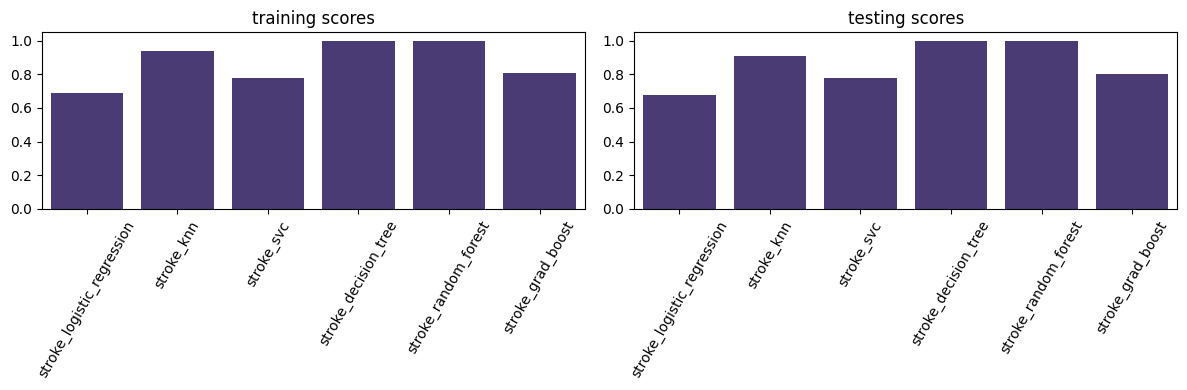

In [147]:
#3. Stroke

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(x = stroke_training_scores.keys(), y = stroke_training_scores.values())
plt.title('training scores')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
sns.barplot(x = stroke_testing_scores.keys(), y = stroke_testing_scores.values())
plt.title('testing scores')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [148]:

max_key = max(stroke_training_scores, key=stroke_training_scores.get)
max_value = stroke_training_scores[max_key]

print('Maximum training accuracy ',max_value, ' achieved by ' , max_key) 

Maximum training accuracy  1.0  achieved by  stroke_decision_tree


In [149]:

max_key = max(stroke_testing_scores, key=stroke_testing_scores.get)
max_value = stroke_testing_scores[max_key]

print('Maximum training accuracy ',max_value, ' achieved by ' , max_key) 

Maximum training accuracy  1.0  achieved by  stroke_decision_tree


In [150]:
# Similar to the hypertension, decision tree shows 100% accuracy which is not feasible 

# Instead, the KNN model for the stroke dataset performs optimal having 0.94 training and 0.91 testing accuracy. 

# KNN finalizes here. 

print(stroke_classification_reports['stroke_knn'])

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      5102
           1       0.85      0.99      0.92      5105

    accuracy                           0.91     10207
   macro avg       0.92      0.91      0.91     10207
weighted avg       0.92      0.91      0.91     10207



## End of Code 